
**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

**Edición 2022**

---
## Trabajo práctico entregable - Parte 1

In [ ]:
import io
import matplotlib
import matplotlib.pyplot as plt
import numpy
import pandas as pd
import seaborn

seaborn.set_context('talk')

## Lectura del dataset

En la notebook 00 se explican los detalles de la siguiente sección.

In [ ]:
url = 'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/sysarmy_survey_2020_processed.csv'
df = pd.read_csv(url)

In [ ]:
df[:3]

,profile_gender,profile_age,work_country,work_province,profile_years_experience,work_years_in_company,work_years_in_current_position,work_people_in_charge_of,profile_studies_level,profile_studies_level_state,...,work_has_violence_situations,profile_sexual_orientation,profile_has_disabilities,profile_has_disabilities_hiring_difficulties,company_employee_number,company_main_activity,company_recommended,company_diversity_policies,company_extra_benefits,company_best_companies_city
0,Mujer,26,Argentina,Ciudad Autónoma de Buenos Aires,3.0,3.0,3.0,0,Universitario,En curso,...,En mi trabajo actual,Homosexual,NaN,NaN,501-1000,Servicios / Consultoría de Software / Digital,7,2,"Capacitaciones y/o cursos, Comidas pagas / sub...",NaN
1,Hombre,29,Argentina,Corrientes,5.0,2.0,2.0,4,Universitario,En curso,...,Jamás,Heterosexual,Visual,No,201-500,Otras industrias,8,9,"Horarios flexibles, Stock options / RSUs, Viát...",NaN
2,Mujer,22,Argentina,Ciudad Autónoma de Buenos Aires,2.0,0.0,0.0,0,Secundario,Completado,...,En un trabajo anterior,Bisexual o queer,NaN,No,2001-5000,Otras industrias,6,9,"Clases de gimnasia online, Comidas pagas / sub...",NaN


In [ ]:
# Visualizamos las columnas disponibles
df.columns.values.tolist()

['profile_gender',
 'profile_age',
 'work_country',
 'work_province',
 'profile_years_experience',
 'work_years_in_company',
 'work_years_in_current_position',
 'work_people_in_charge_of',
 'profile_studies_level',
 'profile_studies_level_state',
 'profile_career',
 'profile_university',
 'profile_specialization_courses',
 'profile_open_source_contributions',
 'profile_programming_as_hobby',
 'work_role',
 'tools_platform',
 'tools_programming_languages',
 'tools_frameworks',
 'tools_data_bases',
 'tools_qa_testing',
 'tools_IDEs',
 'tools_work_pc_os',
 'tools_cellphone_os',
 'work_on_call_duty',
 'salary_on_call_duty_charge',
 'work_on_call_duty_charge_type',
 'work_contract_type',
 'salary_monthly_BRUTO',
 'salary_monthly_NETO',
 'salary_in_usd',
 'salary_satisfaction',
 'salary_comparison_last_semester',
 'salary_has_bonus',
 'salary_bonus_tied_to',
 'salary_inflation_adjustment_2020',
 'salary_percentage_inflation_adjustment_2020',
 'salary_month_last_inflation_adjustment',
 'work_

# Ejercicio 1 - Análisis descriptivo

Responder a la pregunta: **¿Cuáles son los lenguajes de programación asociados a los mejores salarios?**

Para ello:
1. Seleccionar las columnas relevantes para analizar.
2. Seleccionar las filas relevantes para analizar. Esto incluye la eliminación de valores extremos y erróneos, pero también puede enfocar el análisis en una sub-población. Por ejemplo, se pueden limitar a personas con un salario mayor que 10000 pesos, o a las personas que trabajan sólo en "Data Science", pero deben justificar su elección y reformular la pregunta inicial de ser necesario.
  * Obtener una lista de los lenguajes de programación más populares. Decidir cuántos y cuáles seleccionan para incluir en el análisis.
  * Para cada una de las otras columnas del punto anterior, elegir los rangos o valores seleccionan para incluir en el análisis.
3. Seleccionar métricas que ayuden a responder la pregunta, y los métodos para analizarlas. Elegir UNA de las siguientes opciones:
  * Comparar las distribuciones de salario para cada lenguaje utilizando visualizaciones. Como la visualización es el producto final, debe ser clara y mostrar información relevante.
  * Comparar medidas de estadística descriptiva sobre la distribución de salario para cada lenguaje. Sean creativos, la estadística descriptiva nos permite decir cosas como: "el 10% de los mejores sueldos los ganan, en su mayoría, programadores que saben kotlin!" (donde *mayoría* es un término medio engañoso que sólo significa más del 50%). Para comparar múltiples lenguajes, les recomendamos usar también visualizaciones.
  * Comparar probabilidades. Por ejemplo: "Si sabés Python o Java, tenés un 30% más de chances de ganar arriba de 100K".

Si lo consideran necesario, realicen varias iteraciones. Es decir, si encuentran que las distribuciones de los lenguajes de programación que seleccionaron inicialmente no son muy diferentes, pueden re-hacer el análisis usando sólo los lenguajes de programación que son diferentes.

In [ ]:
relevant_columns = ['tools_programming_languages', 'salary_monthly_NETO']

### Conteo de frecuencias de los lenguajes de programación

La columna que contiene información sobre los lenguajes de programación utilizados es `tools_programming_languages`. Sus valores son strings con los lenguajes seleccionados separados por comas.



In [ ]:
df.tools_programming_languages[:10]

0                                              Ninguno
1                             HTML, Javascript, Python
2                                              Ninguno
3    Bash/Shell, C, CSS, HTML, Java, Javascript, PH...
4               CSS, HTML, Javascript, SQL, TypeScript
5                                     Java, Javascript
6                                           Javascript
7                                     Java, Javascript
8                          Javascript, PHP, TypeScript
9              Assembler, Bash/Shell, C, C#, Python, R
Name: tools_programming_languages, dtype: object

Las siguientes celdas de código separan estos lenguajes de programación y cuentan la frecuencia con la que aparecen.

No es necesario entender este código en profundidad, aunque sí es un buen ejercicio.

In [ ]:
# Convert the comma-separated string of languages to a list of string.
# Remove 'ninguno de los anteriores' option, spaces and training commas.
def split_languages(languages_str):
  if not isinstance(languages_str, str):
    return []
  # Remove 'other' option
  languages_str = languages_str.lower()\
    .replace('ninguno de los anteriores', '')
  # Split string into list of items
  # Remove spaces and commas for each item
  return [lang.strip().replace(',', '')
          for lang in languages_str.split()]

# Create a new column with the list of languages
df.loc[:, 'cured_programming_languages'] = df.tools_programming_languages\
    .apply(split_languages)
if 'cured_programming_languages' not in relevant_columns:
    relevant_columns.append('cured_programming_languages') 

# Duplicate each row of df for each programming language
# mentioned in the response.
# We only include in df_lang the columns we are going to analyze later, so we
# don't duplicate innecesary information.
df_lang = df.cured_programming_languages\
    .apply(pd.Series).stack()\
    .reset_index(level=-1, drop=True).to_frame()\
    .join(df[relevant_columns])\
    .rename(columns={0: 'programming_language'})
# Horrible programming style! But a lot of data science code can be written with
# as concatenations of functions (pipelines), and there's no elegant way of
# doing that on Python.
df_lang[:5]

,programming_language,tools_programming_languages,salary_monthly_NETO,cured_programming_languages
0,ninguno,Ninguno,43000.0,[ninguno]
1,html,"HTML, Javascript, Python",63000.0,"[html, javascript, python]"
1,javascript,"HTML, Javascript, Python",63000.0,"[html, javascript, python]"
1,python,"HTML, Javascript, Python",63000.0,"[html, javascript, python]"
2,ninguno,Ninguno,127000.0,[ninguno]


En la columna `programming_language` se encuentra cada lenguaje por separado. Notar que si una respuesta contenía 3 lenguajes, como `"HTML, Javascript, Python"`, la fila ha sido replicada 3 veces. Por ello, hay tres filas con índice 1.

In [ ]:
language_count = df_lang.programming_language.value_counts()\
    .reset_index()\
    .rename(columns={'index': 'language', 'programming_language': 'frequency'})
language_count[:15]

,language,frequency
0,javascript,2513
1,sql,2154
2,html,1861
3,python,1475
4,java,1453
5,css,1247
6,bash/shell,993
7,php,891
8,.net,823
9,typescript,779


## Filtrado de lenguajes relevantes

El siguiente código permite seleccionar sólo las filas donde el valor de la columna `programming_language` se encuentre en la lista `interesting_languages`.

In [ ]:
# Filtrado de Lenguajes

relevant_languages = language_count[:10].language # Tomamos los 10 lenguajes mas utilizados para utilizarlos en el analisis

filtered_df_lang = df_lang[df_lang.programming_language.isin(relevant_languages )]
filtered_df_lang[:]

,programming_language,tools_programming_languages,salary_monthly_NETO,cured_programming_languages
1,html,"HTML, Javascript, Python",63000.0,"[html, javascript, python]"
1,javascript,"HTML, Javascript, Python",63000.0,"[html, javascript, python]"
1,python,"HTML, Javascript, Python",63000.0,"[html, javascript, python]"
3,bash/shell,"Bash/Shell, C, CSS, HTML, Java, Javascript, PH...",102000.0,"[bash/shell, c, css, html, java, javascript, p..."
3,css,"Bash/Shell, C, CSS, HTML, Java, Javascript, PH...",102000.0,"[bash/shell, c, css, html, java, javascript, p..."
...,...,...,...,...
6093,java,"C, C++, HTML, Java, Javascript, PHP, Python, SQL",72.0,"[c, c++, html, java, javascript, php, python, ..."
6093,javascript,"C, C++, HTML, Java, Javascript, PHP, Python, SQL",72.0,"[c, c++, html, java, javascript, php, python, ..."
6093,php,"C, C++, HTML, Java, Javascript, PHP, Python, SQL",72.0,"[c, c++, html, java, javascript, php, python, ..."
6093,python,"C, C++, HTML, Java, Javascript, PHP, Python, SQL",72.0,"[c, c++, html, java, javascript, php, python, ..."


In [ ]:
language_count_2 = filtered_df_lang.programming_language.value_counts()\
    .reset_index()\
    .rename(columns={'index': 'language', 'programming_language': 'frequency'})
language_count_2[:]

,language,frequency
0,javascript,2513
1,sql,2154
2,html,1861
3,python,1475
4,java,1453
5,css,1247
6,bash/shell,993
7,php,891
8,.net,823
9,typescript,779


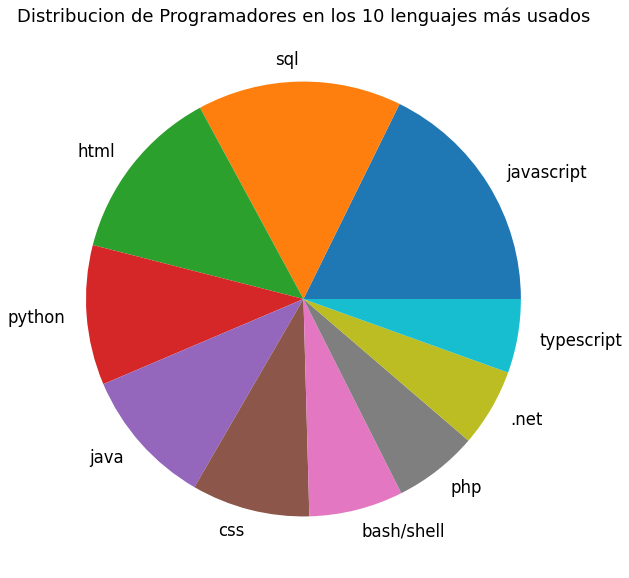

In [ ]:
#Grafico de torta de las medianas de los salarios correspondientes a los 10 lenguajes de programacion mas populares
fig = plt.figure(figsize=(20,10))
label= language_count_2 ["language"]
plt.pie(x= language_count_2 ["frequency"], labels=label, )
plt.title ("Distribucion de Programadores en los 10 lenguajes más usados")
plt.show()

In [ ]:
salary_col = 'salary_monthly_NETO'

Text(1.5500000000000043, 0.5, 'FRECUENCIA ABSOLUTA')

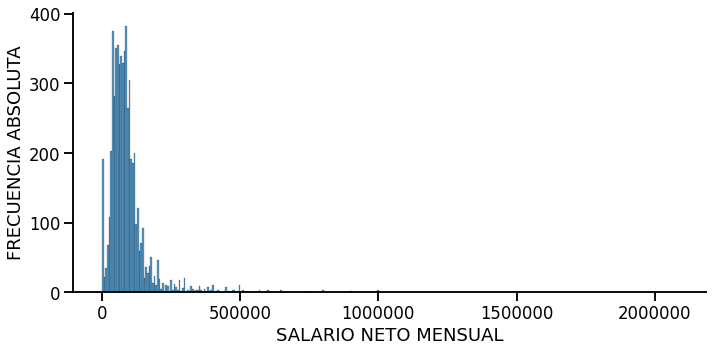

In [ ]:
seaborn.displot(df.salary_monthly_NETO, aspect=2)
plt.ticklabel_format(style='plain', axis='x')
plt.xlabel("SALARIO NETO MENSUAL")
plt.ylabel("FRECUENCIA ABSOLUTA")

In [ ]:
# Describimos estadisticamente la columna de Salario Neto
print(f"median \t{df_lang.salary_monthly_NETO.median()}")
print(df_lang.salary_monthly_NETO.describe().apply(lambda s: '{0:.2f}'.format(s)))

median 	80000.0
count      17353.00
mean      100210.00
std       104789.20
min            1.00
25%        54000.00
50%        80000.00
75%       110000.00
max      2080000.00
Name: salary_monthly_NETO, dtype: object


In [ ]:
# Tomamos las filas correspondientes desde el primer cuartil para descartar los valores nulos o 0, y auqellos que son muy bajos y no queda claro si es un dato erronéo o que se escribio en otra moneda diferente al peso.
#Y consideramos hasta los 500.000, debido a que los valores mas altos son pocos y muy extremos, por lo que afectan lasa medidas de tendencia central como la media.
df_limpio =  df_lang[df_lang[salary_col] < 500000]
df_limpio =  df_limpio[df_limpio[salary_col] > 54000]
df_limpio =  df_limpio[df_limpio.programming_language.isin(relevant_languages)]
print(f"median {df_limpio.salary_monthly_NETO.median()}")
print(df_limpio.salary_monthly_NETO.describe().apply(lambda s: '{0:.2f}'.format(s)))

median 93000.0
count      9968.00
mean     112130.52
std       65752.24
min       54100.00
25%       74400.00
50%       93000.00
75%      121225.00
max      490000.00
Name: salary_monthly_NETO, dtype: object


Text(1.5500000000000043, 0.5, 'FRECUENCIA ABSOLUTA')

<Figure size 2304x1296 with 0 Axes>

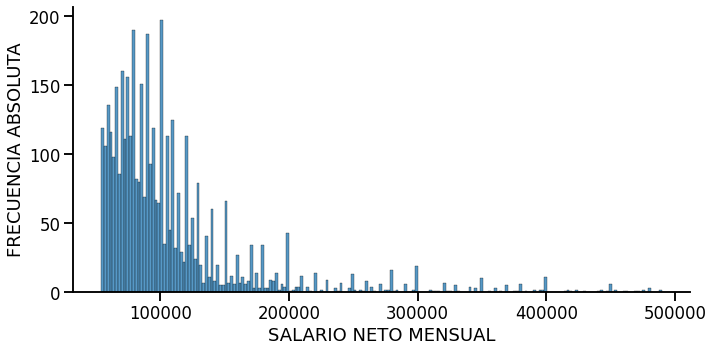

In [ ]:
# grafico de frecuencias del dataset acotado
fig = plt.figure(figsize=(32,18))
seaborn.displot(df_limpio[salary_col], aspect=2, bins=200)
plt.xlabel("SALARIO NETO MENSUAL")
plt.ylabel("FRECUENCIA ABSOLUTA")

In [ ]:
# medidas de tendencia central (Media, Mediana y Variacion Estándar) segun cada lenguaje de programacion de la lista de lenguajes de programacion mas populares
central_tendency = [
    (relevant_lang, df_limpio[df_limpio["programming_language"] == relevant_lang][salary_col].mean(),
     df_limpio[df_limpio["programming_language"] == relevant_lang][salary_col].median(),
    df_limpio[df_limpio["programming_language"] == relevant_lang][salary_col].std())
    for relevant_lang in relevant_languages
]
central_tendency

[('javascript', 114418.68244779581, 93000.0, 69379.17926216304),
 ('sql', 107077.3431342282, 90000.0, 61100.28247661331),
 ('html', 109083.23800978792, 89900.0, 67534.84587146481),
 ('python', 117267.76816021126, 97597.0, 67402.01939471417),
 ('java', 112765.4445412844, 98892.0, 57425.572505712655),
 ('css', 107591.68346485819, 90000.0, 65178.23901483182),
 ('bash/shell', 115871.77112582781, 100000.0, 63797.80660657933),
 ('php', 111134.46142611683, 90000.0, 65428.646806401164),
 ('.net', 108985.29700692042, 90000.0, 66022.79378788533),
 ('typescript', 119155.64404513889, 95920.5, 75072.19035216705)]

In [ ]:
central_tendency_df = pd.DataFrame(central_tendency,
                                   columns=['programming_language', 'mean', 'median', 'std']).sort_values(by='mean')

central_tendency_df

,programming_language,mean,median,std
1,sql,107077.343134,90000.0,61100.282477
5,css,107591.683465,90000.0,65178.239015
8,.net,108985.297007,90000.0,66022.793788
2,html,109083.238010,89900.0,67534.845871
7,php,111134.461426,90000.0,65428.646806
4,java,112765.444541,98892.0,57425.572506
0,javascript,114418.682448,93000.0,69379.179262
6,bash/shell,115871.771126,100000.0,63797.806607
3,python,117267.768160,97597.0,67402.019395
9,typescript,119155.644045,95920.5,75072.190352


Text(0.5, 0, '$')

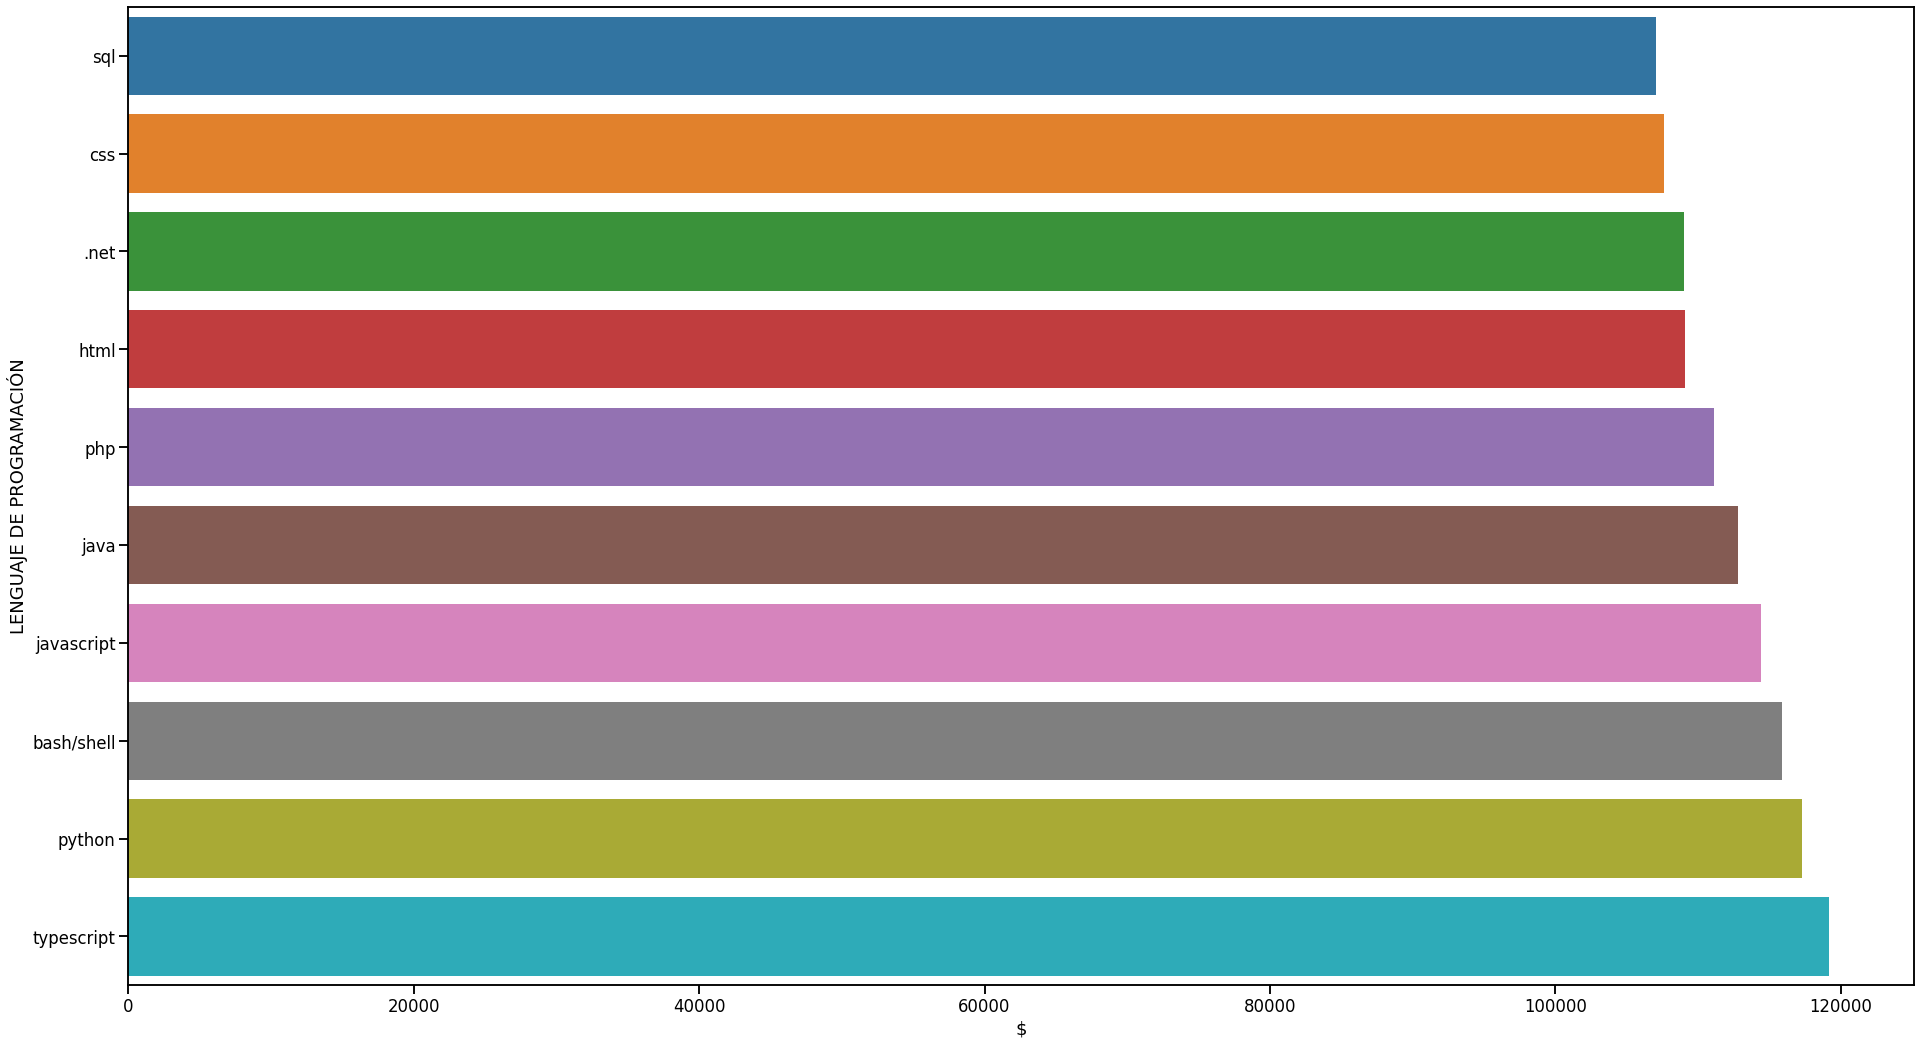

In [ ]:
# grafico de barras de las medianas de los salarios de los 10 lenguajes de programacion mas populares.
fig = plt.figure(figsize=(32,18))
seaborn.barplot(x=central_tendency_df["mean"], y=central_tendency_df["programming_language"])
plt.ylabel("LENGUAJE DE PROGRAMACIÓN")
plt.xlabel("$")

Text(0.5, 0, 'LENGUAJE DE PROGRAMACIÓN')

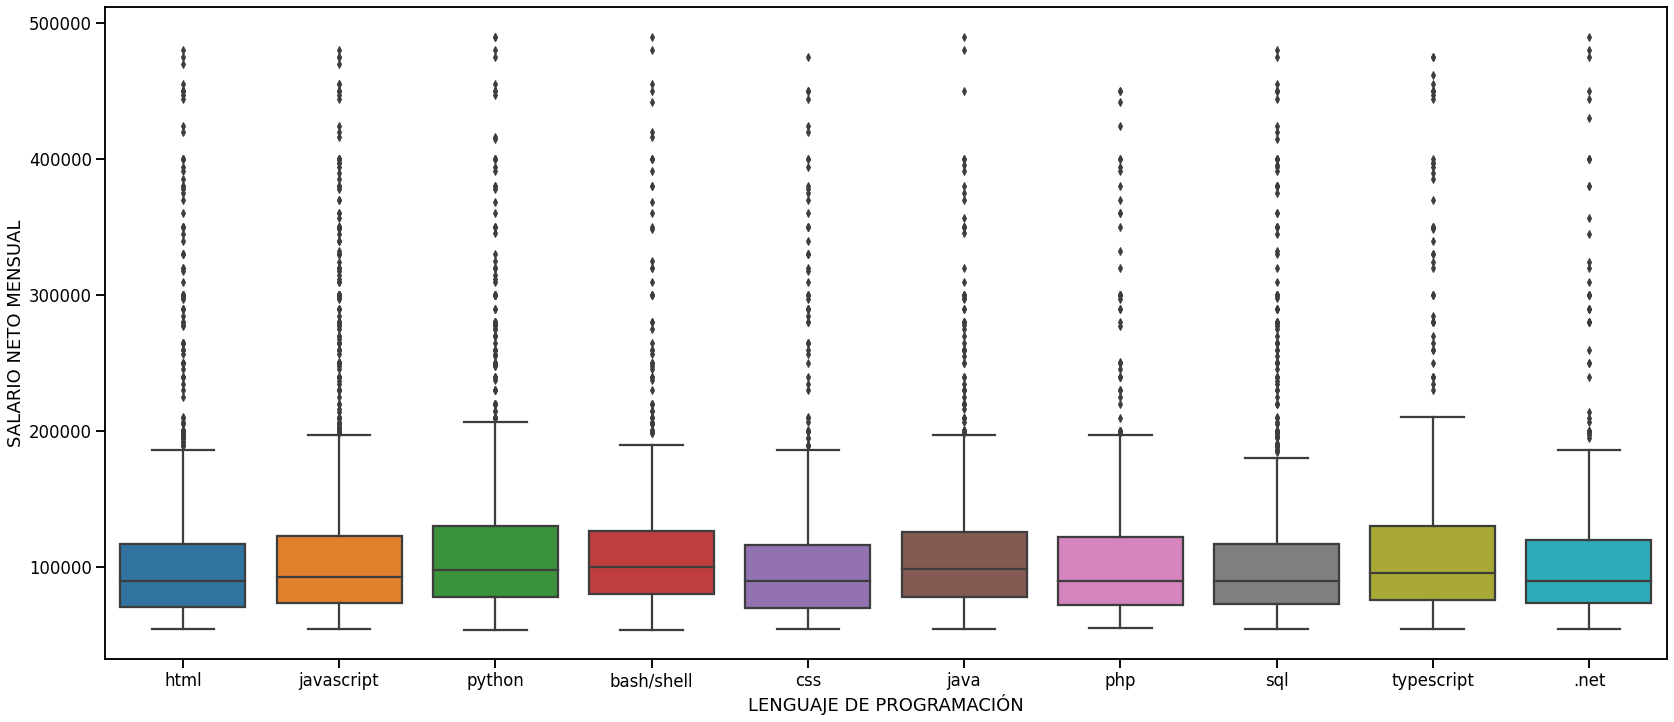

In [ ]:
fig = plt.figure(figsize=(28,12))
seaborn.boxplot(x="programming_language", y="salary_monthly_NETO", data=df_limpio)
plt.ylabel("SALARIO NETO MENSUAL")
plt.xlabel("LENGUAJE DE PROGRAMACIÓN")

Las medidas de tendencia central en los lenguajes analizados son muy similares, cuentan con un mínima variación alrededor del valor de 90.000. 

### **¿Cuáles son los lenguajes de programación asociados a los mejores salarios?**

A partir del analisis realizado sobre la distribución del Salario Neto Mensual en los lenguajes de programación mas usados, evidenciamos que los mejores salarios están asociados a los siguientes lenguajes: Python, java y typescript.

# Ejercicio 2 - Densidades y varias variables

Responder a la pregunta general: **¿Que herramientas (prácticas y teóricas) són útiles para explorar la base, descubrir patrones, asociaciones?**

Para ello considere (igual al ejercicio Anterior):
1. Seleccionar las columnas relevantes para analizar.
2. Seleccionar las filas relevantes para analizar. Esto incluye la eliminación de valores extremos y erróneos, pero también puede enfocar el análisis en sub-poblaciones. 

## a) Densidad conjunta

Que herramientas visuales y modelos puede utilizar para estudiar la distribución y comportamiento de sus datos? 

Elija tres variables numéricas y 2 variables categóricas. Visualice la base según varias de las variables elegidas. Puede describir de alguna forma el comportamiento de sus datos? Que herramientas utilizaría? Describa




In [ ]:
#Columnas elegidas para analizar:
salary_col = 'salary_monthly_NETO' # numerica
age_col = 'profile_age' # numerica
year_exp_col = 'profile_years_experience' # numerica
salary_satisfaction_col = 'salary_satisfaction' # categorica
work_contract_type = 'work_contract_type' # categorica


A continuacion realizamos distintas visualizaciones para observar su comportamiento:

Text(11.25, 0.5, 'SALRIO NETO MENSUAL')

<Figure size 1440x720 with 0 Axes>

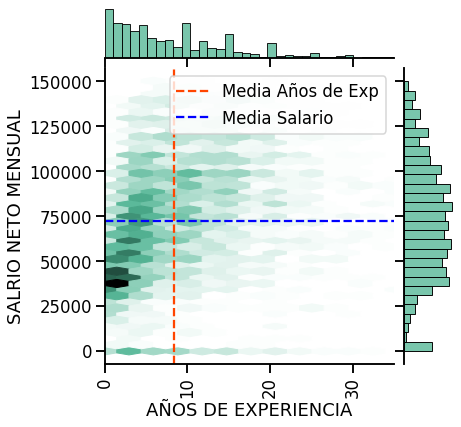

In [ ]:
max_salary = 150000
fig = plt.figure(figsize=(20,10))
seaborn.jointplot(data=df[df.salary_monthly_NETO< max_salary], x='profile_years_experience',
                  y='salary_monthly_NETO', kind='hex', height=6, xlim=(0,35), color="#4CB391")
plt.axvline(df[df.salary_monthly_NETO < max_salary]['profile_years_experience'].mean(), color='orangered',
            linestyle='--', label='Media Años de Exp')
plt.axhline(df[df.salary_monthly_NETO < max_salary]['salary_monthly_NETO'].mean(), color='blue',
            linestyle='--', label='Media Salario')
plt.legend()
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation=90)
plt.xlabel("AÑOS DE EXPERIENCIA")
plt.ylabel("SALRIO NETO MENSUAL")

En el gráfico se visualiza que la mayor parte de los encuestados cuenta con menos de 10 años de experiencia, y a diferencia del salario que parece presentar una distribución tendiente a una normal centrada en la media, los años de experiencia tienen una distribución compeltamente asimétrica.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


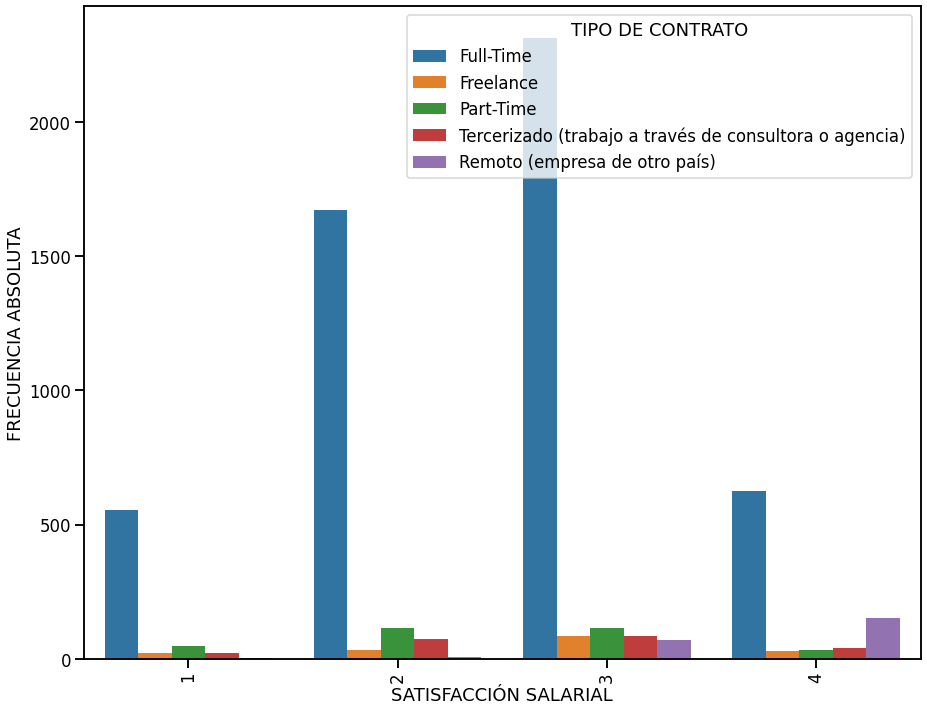

In [ ]:
fig = plt.figure(figsize=(15,12))
seaborn.countplot(df.salary_satisfaction,  hue=df.work_contract_type,)
plt.xticks(rotation=90)
plt.xlabel("SATISFACCIÓN SALARIAL")
plt.ylabel("FRECUENCIA ABSOLUTA")
plt.legend(title="TIPO DE CONTRATO")

En la gráfica se visualiza que los encuestados con trabajo remoto son los únicos con una tendencia marcada a tener una satisfacción salarial alta, mientras que las demás categorias se encuentran distribuidas en todos los niveles de satisfacción.

5883
5431
0.9231684514703382


Text(0, 0.5, 'SALARIO NETO MENSUAL')

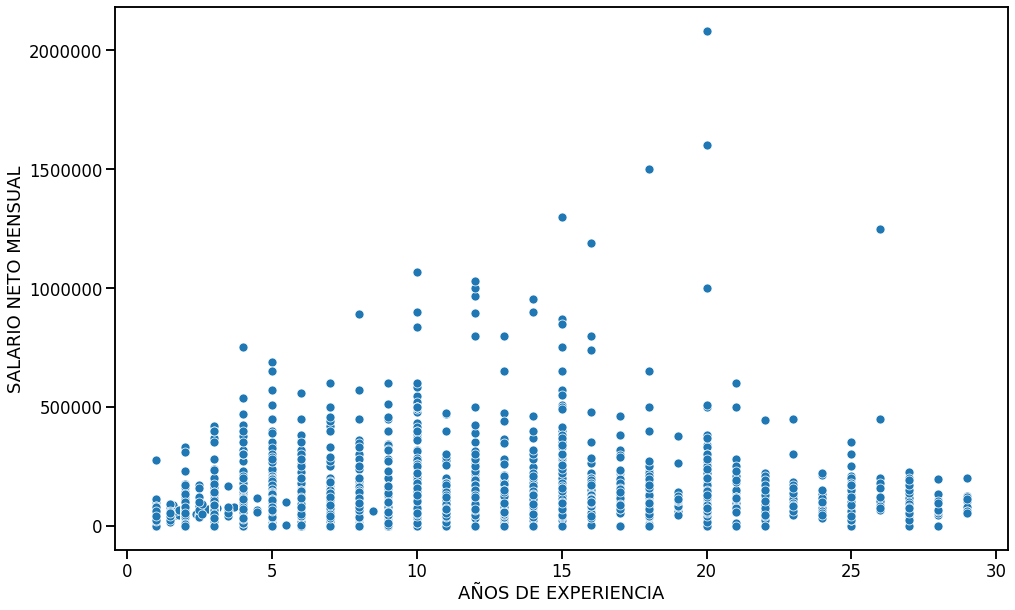

In [ ]:
plt.figure(figsize=(16,10))
max_age = 100
max_year_exp = 30
df_year_exp_salary = df[(df.profile_age < max_age) & (df.profile_years_experience < max_year_exp) & (df.profile_years_experience > 0)]
seaborn.scatterplot(data=df_year_exp_salary,
                    x=year_exp_col, y=salary_col,)
plt.ticklabel_format(style='plain', axis='y')
print(df.salary_monthly_NETO.count())
print(df_year_exp_salary[df_year_exp_salary.salary_monthly_NETO < 500000].salary_monthly_NETO.count())
print(df_year_exp_salary[df_year_exp_salary.salary_monthly_NETO < 500000].salary_monthly_NETO.count() / df.salary_monthly_NETO.count())
plt.xlabel("AÑOS DE EXPERIENCIA")
plt.ylabel("SALARIO NETO MENSUAL")

### Considerando:
*   Edad máxima: 100 años
*   Cantidad años experiencia: 30 años
*   Salario máximo: 200.000 pesos argentinos









Total: 5883
Cantidad menor a 200000: 5147
Considerando un salario máximo de 500000 pesos argentinos el 87.48937616862145% es menor a 2000000 pesos argentinos


Text(0, 0.5, 'SALARIO NETO MENSUAL')

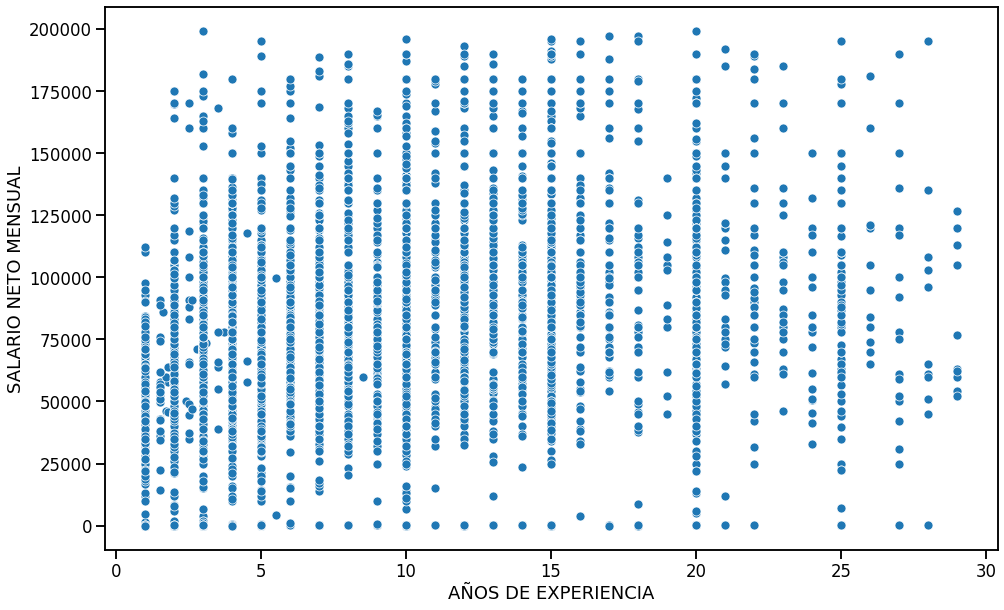

In [ ]:
plt.figure(figsize=(16,10))
max_salary = 200000
df_year_exp_salary = df_year_exp_salary[df_year_exp_salary.salary_monthly_NETO < max_salary]
seaborn.scatterplot(data=df_year_exp_salary,
                    x=year_exp_col, y=salary_col,)
plt.ticklabel_format(style='plain', axis='y')
print(f"Total: {df.salary_monthly_NETO.count()}")
print(f"Cantidad menor a 200000: {df_year_exp_salary[df_year_exp_salary.salary_monthly_NETO < 200000].salary_monthly_NETO.count()}")
less_than_200000 = (df_year_exp_salary[df_year_exp_salary.salary_monthly_NETO < 200000].salary_monthly_NETO.count() / df.salary_monthly_NETO.count()) * 100
print(f"Considerando un salario máximo de 500000 pesos argentinos el {less_than_200000}% es menor a 2000000 pesos argentinos")
plt.xlabel("AÑOS DE EXPERIENCIA")
plt.ylabel("SALARIO NETO MENSUAL")

El 88% de la poblacion tiene un salario por debajo de los 200.000 pesos argentinos de salario neto, sin importar los años de experiencia.

## b) Asociación

* Necesitamos decidir si sacar o no la columna de salario bruto. Para hacer la encuesta más simple.
¿Existe una correlación entre el salario bruto y el neto? Que abordaje y medidas usaría



In [ ]:
df_limpio =  df[df['salary_monthly_NETO'] < 500000]
df_limpio =  df_limpio[df_limpio['salary_monthly_NETO'] > 54000]

#percentil
k = 90

#salarios NETOS
percentile_k_N = df_limpio['salary_monthly_NETO'].quantile(k / 100)
n_below_N = df_limpio['salary_monthly_NETO'] < percentile_k_N
n_above_N = df_limpio['salary_monthly_NETO'] >= percentile_k_N
print('Percentil {} de la columna {}: {}'.format(k, 'salary_monthly_NETO', percentile_k_N))
print('% de datos SNETO menor que percentil {}: {}'.format(k, len(df_limpio[n_below_N]) / len(df_limpio)))
print('% de datos SNETO mayor que percentil {}: {}'.format(k, len(df_limpio[n_above_N]) / len(df_limpio)))

#salarios Brutos
percentile_k_B = df_limpio['salary_monthly_BRUTO'].quantile(k / 100)
n_below_B = df_limpio['salary_monthly_BRUTO'] < percentile_k_B
n_above_B = df_limpio['salary_monthly_BRUTO'] >= percentile_k_B
print('Percentil {} de la columna {}: {}'.format(k, 'salary_monthly_BRUTO', percentile_k_B))
print('% de datos SBRUTO menor que percentil {}: {}'.format(k, len(df_limpio[n_below_B]) / len(df_limpio)))
print('% de datos SBRUTO mayor que percentil {}: {}'.format(k, len(df_limpio[n_above_B]) / len(df_limpio)))


#Prob Conjunta

intersection_aa=len(df_limpio[n_above_N & n_above_B])/ len(df_limpio)
intersection_bb=len(df_limpio[n_below_N & n_below_B])/ len(df_limpio)
intersection_ab=len(df_limpio[n_above_N & n_below_B])/ len(df_limpio)
intersection_ba=len(df_limpio[n_below_N & n_above_B])/ len(df_limpio)
#n_y_y = len((df[(df['salary_monthly_BRUTO'] < percentile_k_B]) and (df['salary_monthly_NETO'] < percentile_k_N]))
#n_n_n = len((df[df['salary_monthly_BRUTO'] > percentile_k_B] and df['salary_monthly_NETO'] > percentile_k_N])

print('% de datos SBRUTO y SNETO menor que percentil {}: {}'.format(k, intersection_bb))
print('% de datos SBRUTO y SNETO mayor que percentil {}: {}'.format(k, intersection_aa))
print('% de datos SBRUTO menor que percentil y SNETO mayor {}: {}'.format(k, intersection_ab))
print('% de datos SBRUTO mayor que percentil y SNETO menor {}: {}'.format(k, intersection_ba))

Percentil 90 de la columna salary_monthly_NETO: 170000.0
% de datos SNETO menor que percentil 90: 0.8959675495108566
% de datos SNETO mayor que percentil 90: 0.1040324504891434
Percentil 90 de la columna salary_monthly_BRUTO: 237000.0
% de datos SBRUTO menor que percentil 90: 0.8997852541159628
% de datos SBRUTO mayor que percentil 90: 0.10021474588403723
% de datos SBRUTO y SNETO menor que percentil 90: 0.8830827964686232
% de datos SBRUTO y SNETO mayor que percentil 90: 0.08732999284180387
% de datos SBRUTO menor que percentil y SNETO mayor 90: 0.016702457647339537
% de datos SBRUTO mayor que percentil y SNETO menor 90: 0.012884753042233358


In [ ]:
d = [ ["NETO per k%", intersection_aa, intersection_ab, intersection_aa+intersection_ab],
     ["NETO noper k%", intersection_ba, intersection_bb, intersection_bb+intersection_ba],["margin", intersection_aa+intersection_ba, intersection_ab+intersection_bb, '1']]

tabla = pd.DataFrame(d, columns = [' ','BRUTO per. k%','BRUTO noper. k%', 'margin'])
print(tabla)

                  BRUTO per. k%  BRUTO noper. k%    margin
0    NETO per k%       0.087330         0.016702  0.104032
1  NETO noper k%       0.012885         0.883083  0.895968
2         margin       0.100215         0.899785         1


In [ ]:
Bpk=len(df_limpio[n_above_B]) / len(df_limpio)
Npk=len(df_limpio[n_above_N]) / len(df_limpio)
precision=0.01
BpkXNpk=(intersection_aa+intersection_ba)*(intersection_aa+intersection_ab)
print(BpkXNpk)
print(intersection_aa-BpkXNpk)

if abs(intersection_aa-BpkXNpk)<precision:
  print('La probabilidad de que el sueldo bruto y neto pertenescan al %.2f percentil coincide con el producto de la probabilidades individuales, luego podemos decir que los eventos son independientes')
else:
  print('Los eventos son dependientes')

0.010425585589463191
0.07690440725234068
Los eventos son dependientes


Text(0, 0.5, 'SALARIO BRUTO MENSUAL')

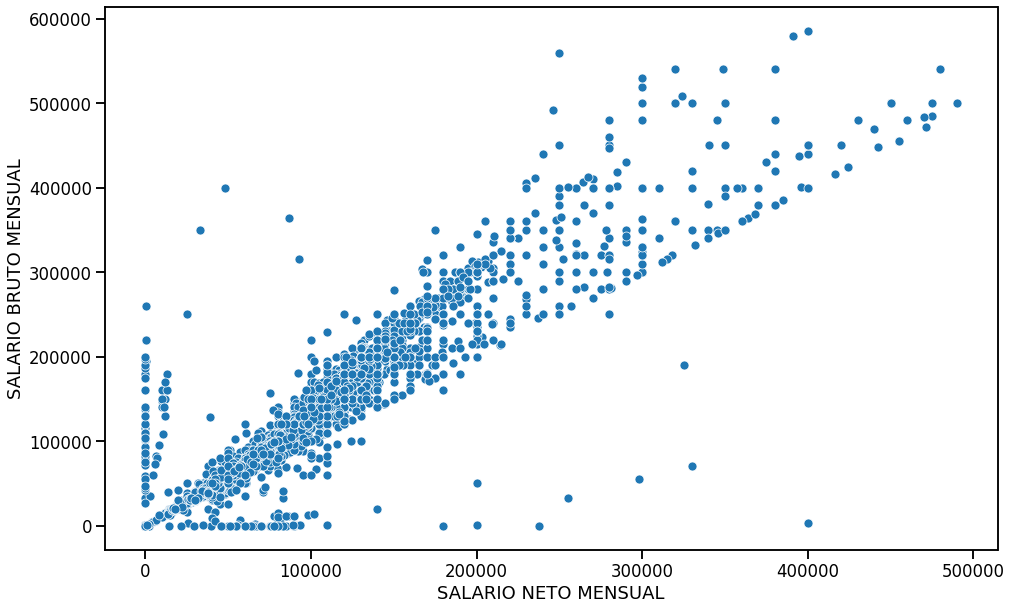

In [ ]:
plt.figure(figsize=(16,10))
max_salary_neto = 500000
max_salary_bruto = max_salary_neto * 1.18
df_cleaned = df[(df.salary_monthly_NETO < max_salary_neto) & (df.salary_monthly_BRUTO < max_salary_bruto)]
seaborn.scatterplot(data=df_cleaned,
                    x='salary_monthly_NETO', y='salary_monthly_BRUTO')
plt.xlabel("SALARIO NETO MENSUAL")
plt.ylabel("SALARIO BRUTO MENSUAL")

Si existe correlación entre el Salario Bruto y Salario Neto, comprobamos graficamente y a traves del calculo de la probabilidad condicional que las variables son dependientes. 
Por lo tanto, la columna de Salario Bruto podria sacarse del Data Frame, ya que los valores que aporta, igual estarian contemplados en Salario Neto Mensual

## c) Densidad condicional 

Estudie la distribución del salario según el nivel de estudio.

Separe la población según el nivel de estudio (elija dos subpoblaciones numerosas) y grafique de manera comparativa ambos histogramas de la variable `'salary_monthly_NETO'`
¿Considera que ambas variables son independientes?
¿Qué analizaría al respecto?

Calcule medidas de centralización y dispersión para cada subpoblación






/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


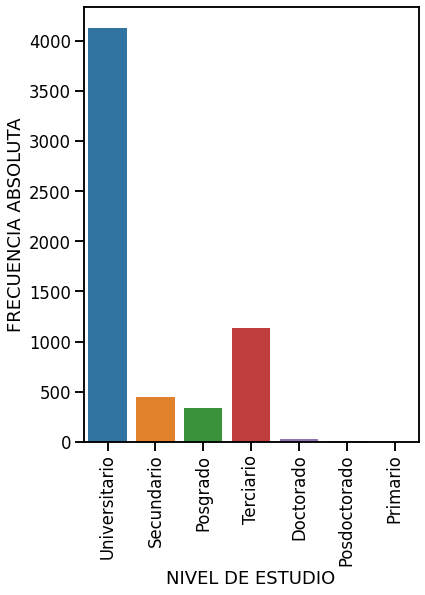

In [ ]:
fig = plt.figure(figsize=(6,8)) 
seaborn.countplot(df.profile_studies_level, )
plt.xticks(rotation=90)
plt.xlabel("NIVEL DE ESTUDIO")
plt.ylabel("FRECUENCIA ABSOLUTA")
plt.show()

En base al gráfico de frecuencias de los Nieveles de Estudio elegimos las dos subplobaciones más numerosas: Universitario y Terciario.

In [ ]:
uni= df_limpio.profile_studies_level == 'Universitario'
ter= df_limpio.profile_studies_level == 'Terciario'

groupA = df_limpio[uni].salary_monthly_NETO
groupB= df_limpio[ter].salary_monthly_NETO

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'FRECUENCIA RELATIVA')

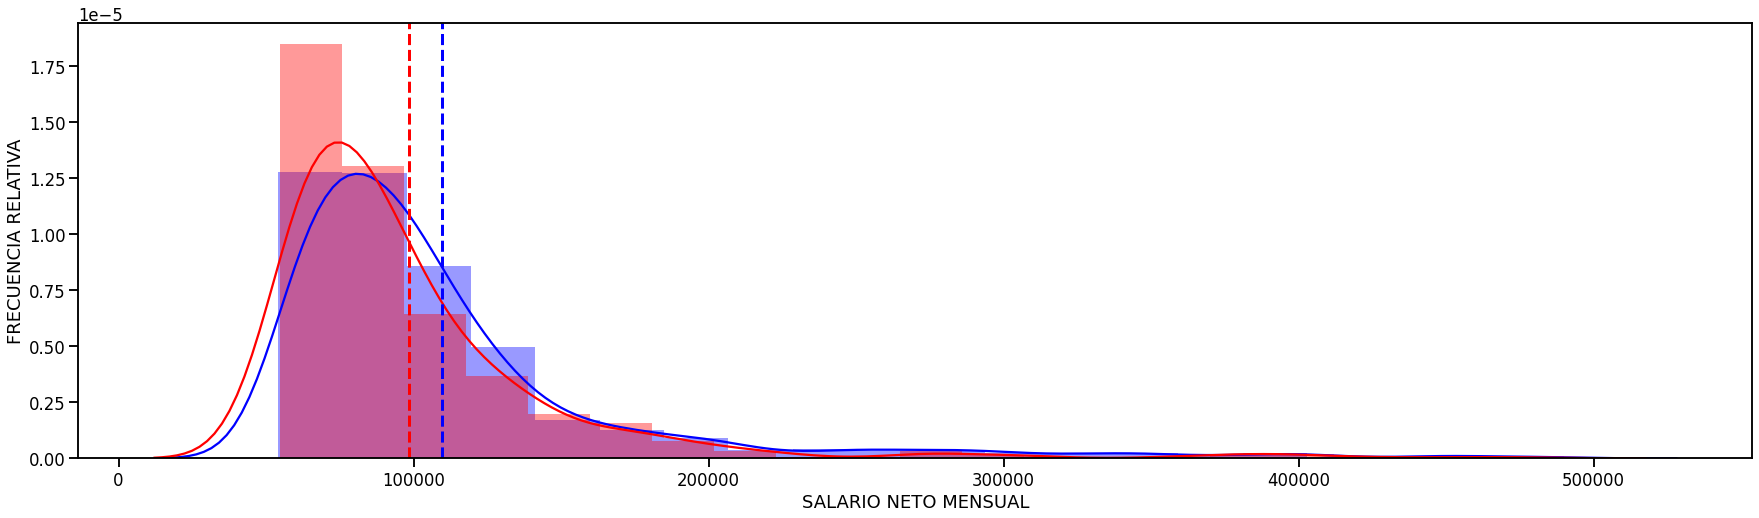

In [ ]:
plt.figure(figsize=(30, 8))
ax1 = seaborn.distplot(groupA, bins=20, color='b')
ax2 = seaborn.distplot(groupB, bins=20, color='r')
plt.axvline(numpy.mean(groupA), color='b', linestyle='dashed', linewidth=3, label='Media Universitarios')
plt.axvline(numpy.mean(groupB), color='r', linestyle='dashed', linewidth=3, label='Media Terciario')
plt.xlabel("SALARIO NETO MENSUAL")
plt.ylabel("FRECUENCIA RELATIVA")

In [ ]:
studies_level_col = 'profile_studies_level'

In [ ]:
central_tendency_study_level = [
    (study_level, df_cleaned[df_cleaned["profile_studies_level"] == study_level][salary_col].mean(),
     df_cleaned[df_cleaned["profile_studies_level"] == study_level][salary_col].median(),
     df_cleaned[df_cleaned["profile_studies_level"] == study_level][salary_col].std(), 
     df_cleaned[df_cleaned["profile_studies_level"] == study_level][salary_col].count())
    for study_level in df_cleaned[studies_level_col].unique()
]
central_tendency_df = pd.DataFrame(central_tendency_study_level,
                                    columns=['study_level', 'mean', 'median', 'std', 'count'])
 
#tomando universitario y terciario
central_tendency_df_cleaned = central_tendency_df[central_tendency_df["study_level"].isin(['Terciario', 'Universitario'])]
print(central_tendency_df_cleaned)

     study_level          mean   median           std  count
0  Universitario  89137.308637  80000.0  61091.117070   3929
3      Terciario  76956.028956  68000.0  53112.382705   1097


No se aprecia una variacion en la distribucion de los salarios para las subpoblaciones analizadas.

## d) Densidad Conjunta condicional

Elija dos variables numéricas y una categórica. 
Estudie la dispersión (scatterplot) de las dos variables discriminando en color por la variable categórica (ayuda: hue en seaborn)


In [ ]:
#Columnas elegidas para analizar:
salary_col = 'salary_monthly_NETO' # numerica
work_contract_type = 'work_contract_type' # categorica
salary_col_br = "salary_monthly_BRUTO" #numerica


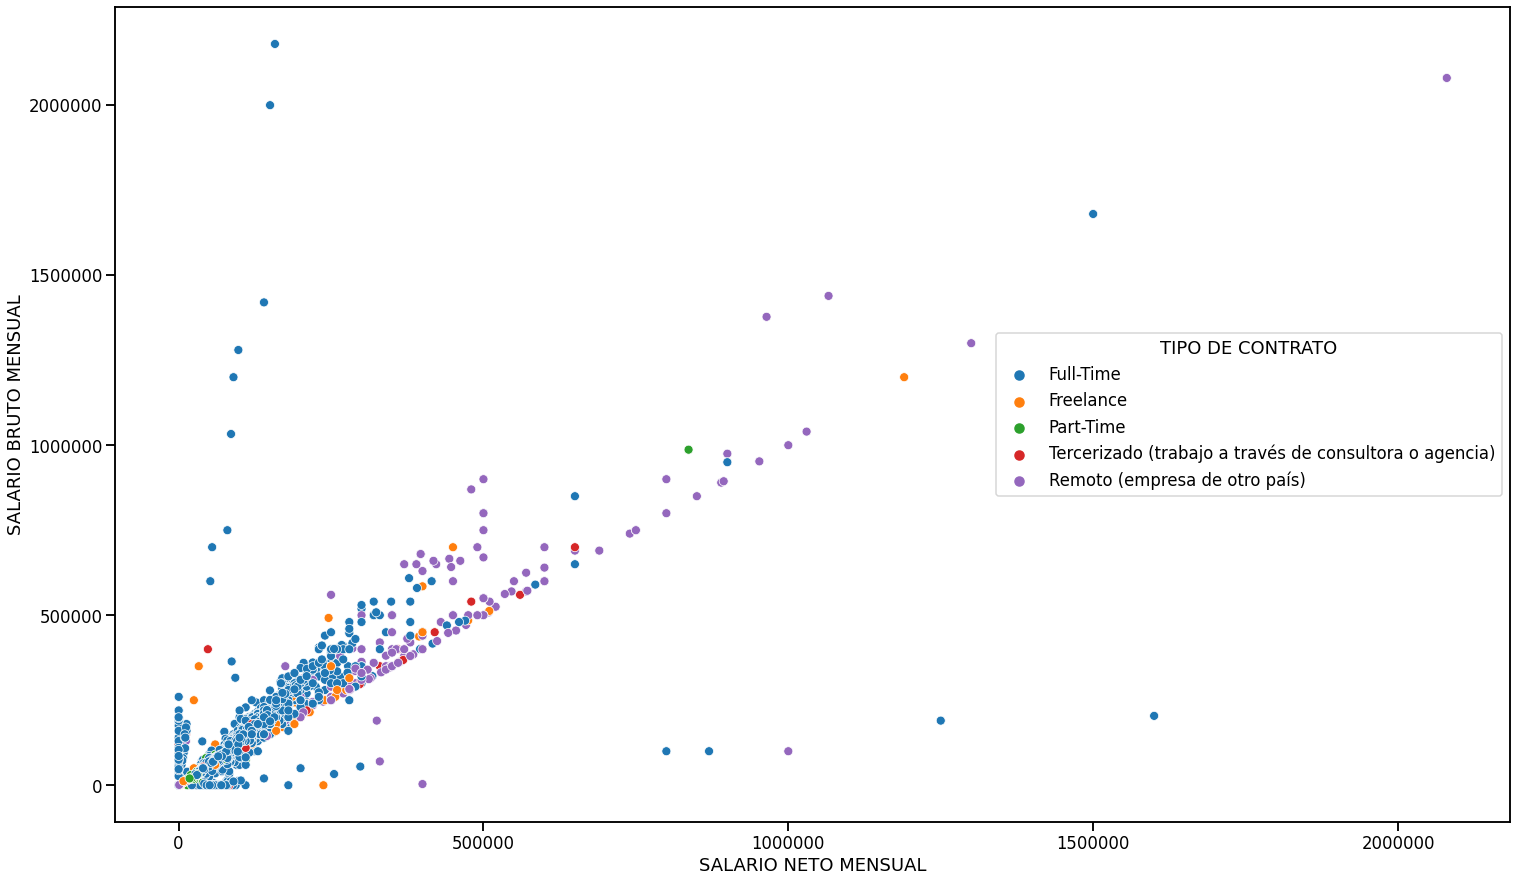

In [ ]:
plt.figure(figsize=(25,15))
df_cleaned = df[(df.profile_age < 100) & (df.profile_years_experience < 30)]
seaborn.scatterplot(data=df_cleaned,
                    x='salary_monthly_NETO', y='salary_monthly_BRUTO', hue='work_contract_type')
plt.ticklabel_format(style='plain', axis='y')
plt.ticklabel_format(style='plain', axis='x')
plt.xlabel("SALARIO NETO MENSUAL")
plt.ylabel("SALARIO BRUTO MENSUAL")
plt.legend(title="TIPO DE CONTRATO")

Las variables elegidas presentan poca dispersión.
Los puntos correspondientes a Full-Time se encuentran mas concetrados por debajo de la media, mientras que los puntos de trabajo remoto, si bien son menos, se encuentran mas dispersos y corresponden a los salarios mas altos.

### ¿Que herramientas (prácticas y teóricas) són útiles para explorar la base, descubrir patrones, asociaciones?

Para descubirir patrones y asocianes entre distintas variables son útiles principlamente las visualizaciones como Histogramas, Gráficos de Dispersion, Gráficos de Barra, etc.
En cuanto a las herramientas teóricas, son útiles las brindadas por la estadística descrptiva, como la media, mediana, desviación, etc. 
También el análisis de probabilidades condicionales, que es el mas claro con respecto a la relacion de dependencia entre las variables.